In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100

In [2]:
test = pd.read_csv('test.csv')
#test.head()

In [3]:
data = pd.read_csv('train.csv')
#data.head()

Запоминаем train по индексу, чтобы потом разделить файлы.

In [4]:
idx_split = data.shape[0]

Соединяем файлы тренировочный и тестовый для обработки данных.

In [5]:
df = pd.concat([data, test],axis=0,ignore_index=False, sort=False)

Переназначаем индексы, удаляя дубли индексов.

In [6]:
df.reset_index(drop=True, inplace=True)

Проверяем успешность соединения.

In [7]:
df.shape

(15000, 20)

Проверяем на наличие одинаковых индексов.

In [8]:
df[df.index.duplicated()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Смотрим кол-во столбцов в DataFrame.

In [9]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
Id               15000 non-null int64
DistrictId       15000 non-null int64
Rooms            15000 non-null float64
Square           15000 non-null float64
LifeSquare       11846 non-null float64
KitchenSquare    15000 non-null float64
Floor            15000 non-null int64
HouseFloor       15000 non-null float64
HouseYear        15000 non-null int64
Ecology_1        15000 non-null float64
Ecology_2        15000 non-null object
Ecology_3        15000 non-null object
Social_1         15000 non-null int64
Social_2         15000 non-null int64
Social_3         15000 non-null int64
Healthcare_1     7825 non-null float64
Helthcare_2      15000 non-null int64
Shops_1          15000 non-null int64
Shops_2          15000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 2.1+ MB


### drop Healthcare_1

Так как, колонка Healthcare_1 имеет много пропусков, мы ее удаляем.

In [11]:
df = df.drop('Healthcare_1', axis=1)

In [12]:
#df.info()

### HouseYear

Просматриваем год постройки дома и цены.(ищем аномалии)

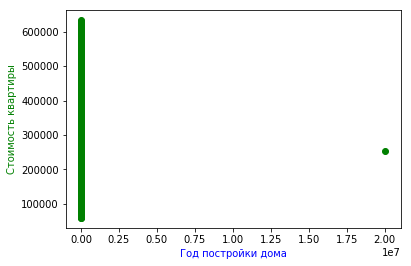

In [13]:
plt.scatter(df['HouseYear'], df['Price'],color='g')
plt.xlabel('Год постройки дома', color='b')
plt.ylabel('Стоимость квартиры', color='g');

In [14]:
df['HouseYear'].describe()

count    1.500000e+04
mean     3.321575e+03
std      1.637078e+05
min      1.908000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [15]:
2.005201e+07

20052010.0

Странные года постройки.

In [16]:
df.loc[df['HouseYear']>2020, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


Меняем опечатку в дате постройки.

In [17]:
df.loc[df['HouseYear']==4968,'HouseYear']=1968

In [18]:
df.loc[df['Id'] == 11607, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,1968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [19]:
df.loc[df['HouseYear'] == 20052011,'HouseYear']= 2008

Проверяем min год постройки.

In [20]:
df.loc[df['HouseYear'] < 1910, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
10002,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,5,5,B,NaN
13253,12316,183,5.0,157.976101,101.040485,12.0,7,8.0,1908,0.246624,B,B,14,2940,45,3,6,B,NaN


#### ROOMS

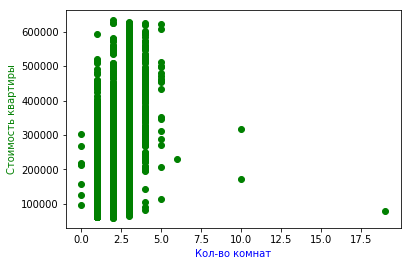

In [21]:
plt.scatter(df['Rooms'], df['Price'],color='green')
plt.xlabel('Кол-во комнат', color='b')
plt.ylabel('Стоимость квартиры', color='g');

In [22]:
df['Rooms'].describe()

count    15000.000000
mean         1.897000
std          0.839229
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

Сравниваем общую площадь с количеством комнат.

In [23]:
df.loc[df['Rooms']>6, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863
13398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B,NaN


In [24]:
#df.loc[df['Rooms']== 0, :]

Заменяем опечатки. Площадь однокомнатной квартиры с количеством комнат 19, и квартиры с площадью двухкомнатных с количеством комнат 10.

In [25]:
def correct_rooms(df):
    df.loc[df['Rooms'] == 10,'Rooms']= 2
    df.loc[df['Rooms'] == 19,'Rooms']= 1
    df.loc[df['Rooms'] == 17,'Rooms']= 2
    df.loc[df['Rooms'] == 0,'Rooms']= 1
    return df

In [26]:
df = correct_rooms(df)

Проверяем выполненные действия.

In [27]:
df.loc[df['Id'].isin([5927,8491,14865, 1435]), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,2.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,1.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
8849,14865,9,2.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863
13398,1435,111,2.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B,NaN


### Price

In [28]:
df['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

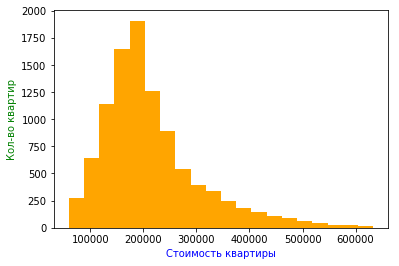

In [29]:
plt.hist(df['Price'], bins=20, color='orange')
plt.xlabel('Стоимость квартиры', color='b')
plt.ylabel('Кол-во квартир', color='g');

### Square and Lifesquare

Выводим разницу больше 5 метров между жилой и общей площадью.

In [30]:
df.loc[df['LifeSquare']-df['Square'] > 5, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,0,2,B,141780.231857
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
4638,4071,6,3.0,75.203314,82.486992,1.0,13,25.0,2015,0.243205,B,B,5,1564,0,0,0,B,211324.917957
6332,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,0,1,B,104891.073757
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978
10410,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,0,0,B,NaN
14713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,0,0,B,NaN


Запоминаем индексы квартир чтобы не потерять и проверить.

In [31]:
#Index_arr = df.loc[df['LifeSquare']-df['Square'] > 5, :].index

In [32]:
#df.loc[Index_arr, :]

Выводим квартиры с площадью меньше 15 метров.

In [33]:
#df.loc[df['Square'] < 15, :]

Меняем данные, которые логически ошибочно.(поменять местами или точка стоит не верно)

In [34]:
def correct_square(df):
    df.loc[df['Id']== 1748,"Square"] = 67
    df.loc[df['Id']== 14990,"Square"] = 48
    df.loc[df['Id']== 10527,"Square"] = 43
    df.loc[df['Id']== 4071,"Square"] = 82
    df.loc[df['Id']== 13265,"Square"] = 79
    df.loc[df['Id']== 11602,"Square"] = 64
    df.loc[df['Id']== 2307,"Square"] = 41
    df.loc[df['Id']== 7917,"Square"] = 21
    df.loc[df['Id']== 28,"Square"] = 60
    df.loc[df['Id']== 7657,"Square"] = 45
    df.loc[df['Id']== 6782,"Square"] = 29
    df.loc[df['Id']== 10202,"Square"] = 26
    df.loc[df['Id']== 11526,"Square"] = 46
    df.loc[df['Id']== 7917,"Square"] = 21
    return df

In [35]:
def correct_lifesquare(df):
    df.loc[df['Id']== 1748,"LifeSquare"] = 54
    df.loc[df['Id']== 14990,"LifeSquare"] = 26
    df.loc[df['Id']== 16550,"LifeSquare"] = 74
    df.loc[df['Id']== 4071,"LifeSquare"] = 75
    df.loc[df['Id']== 8961,"LifeSquare"] = 16
    df.loc[df['Id']== 13265,"LifeSquare"] = 48
    df.loc[df['Id']== 15886,"LifeSquare"] = 46
    df.loc[df['Id']== 11602,"LifeSquare"] = 63
    df.loc[df['Id']== 2307,"LifeSquare"] = 40
    df.loc[df['Id']== 7917,"LifeSquare"] = 21
    df.loc[df['Id']== 28,"LifeSquare"] = 45
    df.loc[df['Id']== 7657,"LifeSquare"] = 45
    df.loc[df['Id']== 6782,"LifeSquare"] = 29
    df.loc[df['Id']== 10202,"LifeSquare"] = 25
    df.loc[df['Id']== 11526,"LifeSquare"] = 19
    df.loc[df['Id']== 7917,"LifeSquare"] = 21
    return df

In [36]:
df = correct_square(df)

In [37]:
df = correct_lifesquare(df)

Проверяем оставшиеся квартиры с площадью меньше 15 метров.

In [38]:
#df.loc[df['Square'] < 15, :]

проверяем выполненые строчки, выборочно по индексу.

In [39]:
df.loc[df['Id'].isin([1748,14990,11526]), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,67.0,54.0,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
590,14990,23,2.0,48.0,26.0,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,0,2,B,141780.231857
1316,11526,27,1.0,46.0,19.0,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441


Смотрим показатели площади и цены на графике.

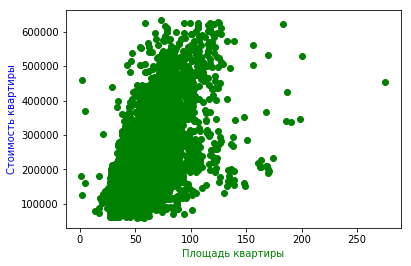

In [40]:
plt.scatter(df['Square'], df['Price'], color='g')
plt.xlabel('Площадь квартиры', color='g')
plt.ylabel('Стоимость квартиры',color='b');

Площадь больше 200 метров

In [41]:
df.loc[df['Square']>200, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016
13217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,1,4,B,NaN
13909,1397,76,3.0,221.138768,118.055342,4.0,32,48.0,2011,0.000000,B,B,7,1660,39,1,5,B,NaN


Площадь больше средних размеров квартир

In [42]:
#df.loc[df['Square']>(df['Rooms'] * 30 + 30), :]

Просматриваем комнаты с маленькой площадью.(меньше 15 метров)

In [43]:
#df.loc[df['Square']<(df['Rooms'] * 15), :]

Проверяем данные выходящие за пределы 2-х комнатной квартиры с размерами от 30 кв.м до 100 кв.метров.

In [44]:
#df.loc[(~df['Square'].between(30,100)) & (df['Rooms'] == 2), :]

Проверяем значение общей площади меньше жилой площади.

In [45]:
#df.loc[df['Square'] < df['LifeSquare'], :]

Выводим общую площадь меньше 15 метров.

In [46]:
#df.loc[df['Square'] < 15, :]

Выравниваем max и min значения общей площади квартир.

In [47]:
def clean_square(df):
    df.loc[df['Square']>(df['Rooms'] * 30 + 30), 'Square'] = df['Rooms'] * 30 + 30
    df.loc[df['Square']<(df['Rooms'] * 15),'Square']= df['Rooms'] * 15
    df.loc[df['Square'] < 17, 'Square']= 17
    df.loc[df['Square']<df['LifeSquare'], 'LifeSquare'] = df['Square']
    return df

In [48]:
df = clean_square(df)

In [49]:
#df['Square'].describe()

### LifeSquare

Выводим жилую площадь меньше 15 метров.

In [50]:
#df.loc[df['LifeSquare'] < 15, :]

In [51]:
df['LifeSquare'].describe()

count    11847.000000
mean        35.790977
std         16.812203
min          0.333490
25%         22.899585
50%         32.806000
75%         45.046477
max        180.000000
Name: LifeSquare, dtype: float64

Приравниваем жилую площадь к 15 метрам, которая меньше 15 метров.

In [52]:
df.loc[df['LifeSquare'] < 15,'LifeSquare'] = df['Square']

####  В LifeSquare заполняем значения NaN (пропущенные значения)

In [53]:
df['LifeSquare'] = df['LifeSquare'].fillna(df['Square'])

In [54]:
#df.info()

#### HouseFloor

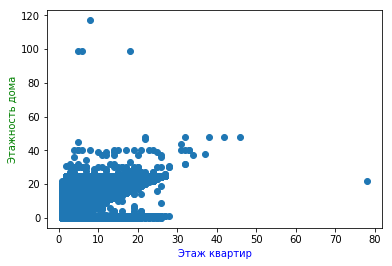

In [55]:
plt.scatter(df['Floor'], df['HouseFloor'])
plt.xlabel('Этаж квартир', color='b')
plt.ylabel('Этажность дома',color='g');

In [56]:
df.loc[df['HouseFloor'] >50, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,71.747869,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,0,2,B,243329.912579
8854,78,30,2.0,65.773749,65.773749,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,3,23,B,207248.370520
10651,15864,27,3.0,47.722835,47.098813,9.0,18,99.0,1977,0.072158,B,B,2,629,1,0,0,A,NaN


Показываем дома с этажностью равные 0.

In [57]:
#df.loc[df['HouseFloor'] == 0, :] 

Дома были построенны в 1977 году, не могут быть этажностью 99 этажей.
Приравниваем этажность = 0, к среднему показателю этажности в домах.

In [58]:
def correct_houseFloor(df):
    df.loc[df['HouseFloor']==99,'HouseFloor']=9
    df.loc[df['HouseFloor']==117,'HouseFloor']=17
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = np.round(df.loc[df['HouseFloor'] != 0, 'HouseFloor'].mean())
    return df

In [59]:
df = correct_houseFloor(df)

Выводим средний показатель этажности домов в таблице.

In [60]:
#df.loc[df['HouseFloor'] != 0, 'HouseFloor'].mean()

In [61]:
np.round(df.loc[df['HouseFloor'] != 0, 'HouseFloor'].mean())

13.0

Проверяем выполненные данные.

In [62]:
df.loc[df['Id'].isin([9300,10806,78]), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,48.709601,1.0,6,9.0,1977,0.150818,B,B,16,3433,4,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,71.747869,9.0,5,9.0,1977,0.075779,B,B,6,1437,3,0,2,B,243329.912579
8854,78,30,2.0,65.773749,65.773749,1.0,8,17.0,1977,0.000078,B,B,22,6398,141,3,23,B,207248.370520


### Floor

Этаж превышает этажность дома.

In [63]:
#df.loc[df['Floor'] > df['HouseFloor'], :]

In [64]:
df.loc[df['Floor'] >50, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
14698,15759,17,2.0,57.60187,37.744743,10.0,78,22.0,1989,0.0,B,B,25,5027,4,1,1,B,NaN


In [65]:
df.loc[df['Id']== 15759,"Floor"] = 8

Если этаж выше этажности дома, приравниваем этажности.

In [66]:
df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df['HouseFloor']

In [67]:
#df.loc[df['Floor'] == 0, :].shape

Выводим средний показатель этажа в доме, в таблице.

In [68]:
#np.round(df.loc[df['Floor'] != 0, 'Floor'].mean())

####  Приравниваем этаж = 0, к среднему показателю этажа в домах.

In [69]:
df.loc[df['Floor'] == 0, 'Floor'] = np.round(df.loc[df['Floor'] != 0, 'Floor'].mean())

In [70]:
#df['Floor'].describe()

#### KitchenSquare

Выводим все кухни равные 0.

In [71]:
#df.loc[df['KitchenSquare'] == 0, :]

In [72]:
np.round(df.loc[df['KitchenSquare'] != 0, 'KitchenSquare'].mean())

7.0

In [73]:
#df.loc[(df['Square'] > 70) & (df['KitchenSquare'] == 0), :] 

Задаем площадь кухни в зависимости от общей площади квартиры.

In [74]:
def create_kitchensquare(df):
    df.loc[(df['Square'] > 50) & (df['KitchenSquare'] < 5),'KitchenSquare'] =  np.round(df.loc[df['Square'] > 50, 'KitchenSquare'].mean())

    df.loc[(df['Square'] > 70) & (df['KitchenSquare'] < 5),'KitchenSquare'] =  np.round(df.loc[df['Square'] > 70, 'KitchenSquare'].mean())

    df.loc[(df['Square'] > 90) & (df['KitchenSquare'] < 5),'KitchenSquare'] =  np.round(df.loc[df['Square'] > 90, 'KitchenSquare'].mean())

    df.loc[(df['Square'] < 50) & (df['KitchenSquare'] < 5),'KitchenSquare'] =  5
    return df

In [75]:
df = create_kitchensquare(df)

Проверяем выполненые данные.

In [76]:
df.loc[(df['Square'] < 50) & (df['KitchenSquare'] < 5), :] .shape

(0, 19)

In [77]:
#df.loc[df['KitchenSquare'] < 5, :]

In [78]:
#df.loc[(df['Square'] > 50) & (df['KitchenSquare'] < 5), :]

Выводим и показываем одноэтажные дома.

In [79]:
df.loc[df['HouseFloor'] == 1, :].shape

(727, 19)

#### меняем все значения в таблица на цифровые.

In [80]:
df.shape

(15000, 19)

In [81]:
df = pd.get_dummies(df)

In [82]:
df.shape

(15000, 22)

Проверяем, колонок прибавилось.

In [83]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [84]:
#df.dtypes

### DistrictId
Просматриваем данные по районам.

In [85]:
df['DistrictId'].nunique()

212

In [86]:
#df['DistrictId'].unique()

In [87]:
df['DistrictId'].dtype

dtype('int64')

Показываем отношение цены и района.

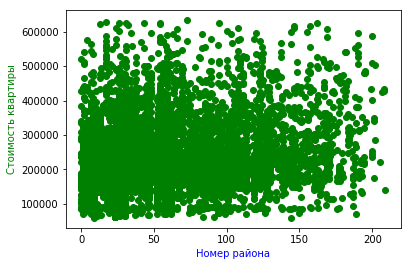

In [88]:
plt.scatter(df['DistrictId'], df['Price'], color='g')
plt.xlabel('Номер района', color='b')
plt.ylabel('Стоимость квартиры',color='g');

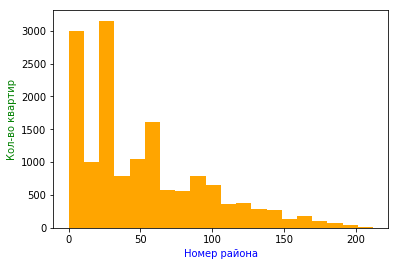

In [89]:
plt.hist(df['DistrictId'], bins=20, color='orange')
plt.xlabel('Номер района', color='b')
plt.ylabel('Кол-во квартир',color='g');

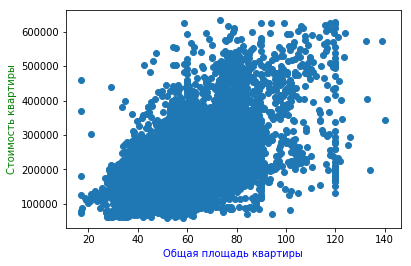

In [90]:
plt.scatter(df.loc[df['Square'] < 145, 'Square'],
            df.loc[df['Square']  < 145, 'Price'])
plt.xlabel('Общая площадь квартиры',color='b')
plt.ylabel('Стоимость квартиры', color='g');

### Выносим train из объединеного df.

In [91]:
data = df.iloc[:idx_split, :]

In [92]:
data.shape

(10000, 22)

### train_test_split
Разделяем data(train) на train и valid

In [93]:
train, valid = train_test_split(data,test_size=0.3, random_state=42)

In [94]:
train.shape, valid.shape

((7000, 22), (3000, 22))

In [95]:
#valid.head()

### GradientBoostingRegressor

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2

In [97]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [98]:
feats = ['DistrictId', 'Rooms', 'Square','LifeSquare', 'KitchenSquare',
         'Floor', 'HouseFloor', 'HouseYear','Ecology_1', 'Social_1', 
         'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
         'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']

In [99]:
model.fit(train.loc[:, feats], train['Price'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
def get_prediction(model, df, feats=feats, evaluate='Yes'):
    pred = model.predict(df.loc[:, feats])
    if evaluate == 'Yes':
        r2_value = r2(df['Price'], pred)
        print('R2: {}'.format(r2_value))
    return pred

In [101]:
pred_train = get_prediction(model=model, df=train)

R2: 0.8097773744426806


In [102]:
pred_valid = get_prediction(model=model, df=valid)

R2: 0.715615420540976


### cross_val_score
Применяя кросс валидацию на целом data, проверяю разброс.

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
pred_data = get_prediction(model=model, df=data)

R2: 0.7816079174010342


In [105]:
np.array(cross_val_score(model, data.loc[:, feats], data['Price'], cv=5)).mean()

0.7249932984005621

In [106]:
np.array(cross_val_score(model, data.loc[:, feats], data['Price'], cv=5)).std()

0.015742664090760923

### Выносим test из объединеного df.

In [107]:
test = df.iloc[idx_split:, :]

Переназначаем индексы.

In [108]:
test.reset_index(drop=True, inplace=True)

In [109]:
test['Price'] = get_prediction(model, test, evaluate='No')

In [110]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,11,2748,1,0,0,169091.724319,0,1,0,1,0,1
1,15856,74,2.0,69.263183,69.263183,6.0,1.0,1.0,1977,0.075779,6,1437,3,0,2,216648.402558,0,1,0,1,0,1
2,5480,190,1.0,17.000000,15.948246,12.0,2.0,5.0,1909,0.000000,30,7538,87,5,5,225849.033808,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,23,4583,3,3,3,355792.342120,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,5.0,17.0,17.0,2017,0.072158,2,629,1,0,0,132089.969890,0,1,0,1,1,0


In [111]:
test['Price'].describe()

count      5000.000000
mean     215749.615560
std       78259.544784
min       60579.245397
25%      165432.269422
50%      195559.613809
75%      249297.658905
max      586080.012495
Name: Price, dtype: float64

In [112]:
#test.loc[:, ['Id', 'Price']].to_csv('AKruzhalov_predictions.csv', index=False)